In [23]:
# Importar bibliotecas adicionales
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [24]:
file_path= 'datos_telecom_preprocesado.csv'

df = pd.read_csv(file_path)

# 1. Análisis de correlación

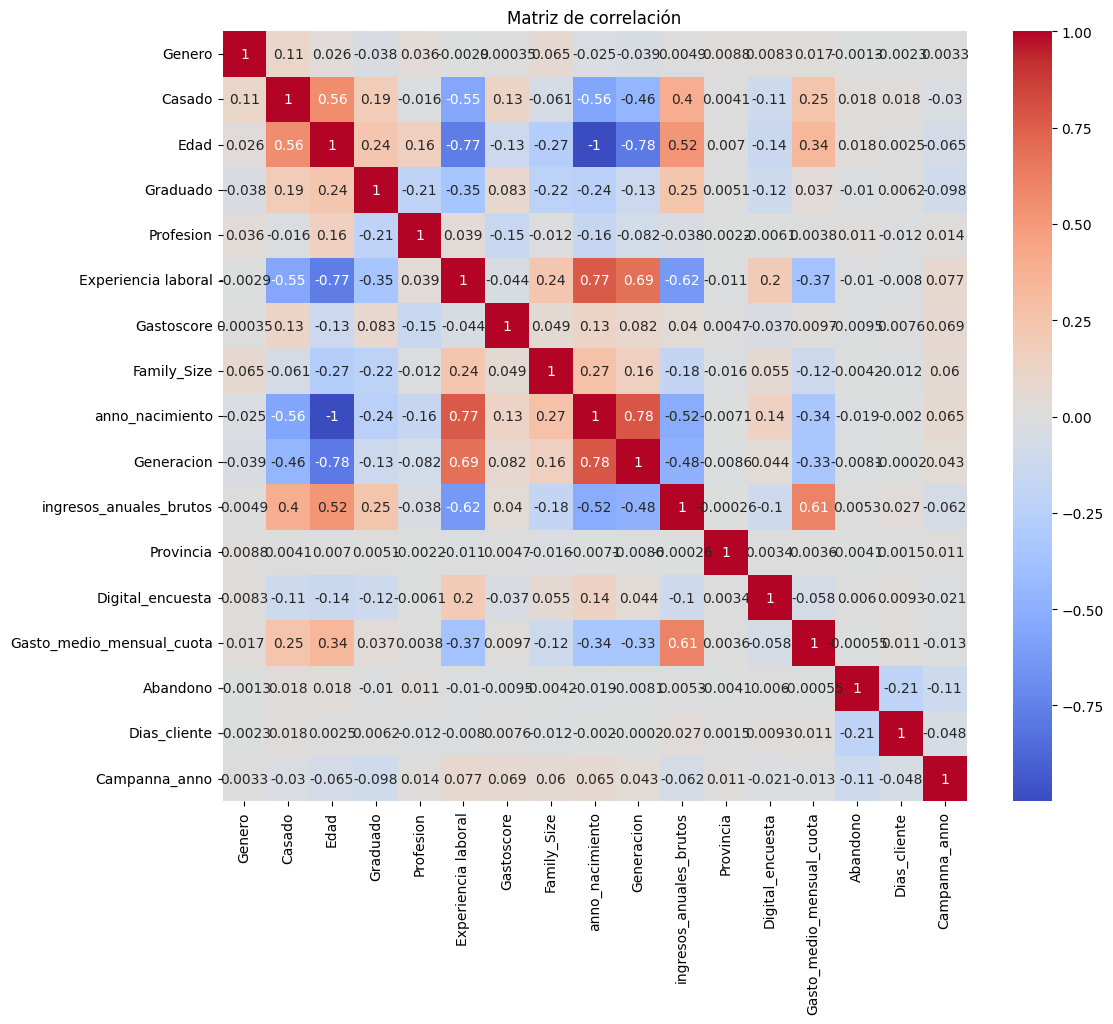

In [25]:
plt.figure(figsize=(12,10))
corr_matrix = df.drop(columns=['ID']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Basado en la matriz de correlación, puedes decidir eliminar variables altamente correlacionadas

# 2. Aplicar PCA para reducción de dimensionalidad

In [42]:
# Excluir columnas no numéricas y la columna 'ID'
features = df.drop(['ID', 'Cluster'], axis=1, errors='ignore')

In [43]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

In [44]:
# Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por cada componente principal: {pca.explained_variance_ratio_[0]}")

Varianza explicada por cada componente principal: 0.9136045335202101


In [45]:
# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# ELECCIÓN DEL ALGORITMO (K-MEANS)

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Determinación del número óptimo de clusters usando el método del codo

In [47]:
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

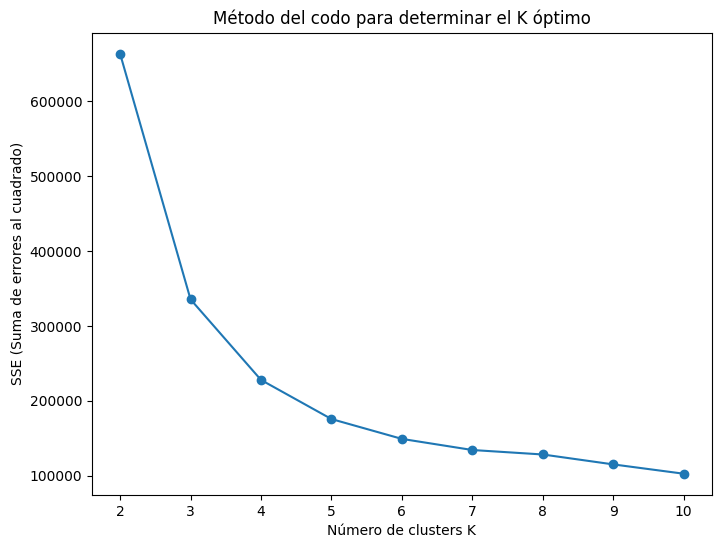

In [48]:
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('SSE (Suma de errores al cuadrado)')
plt.title('Método del codo para determinar el K óptimo')
plt.show()

# 2. Determinación del número óptimo de clusters usando el coeficiente de silueta

In [49]:
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

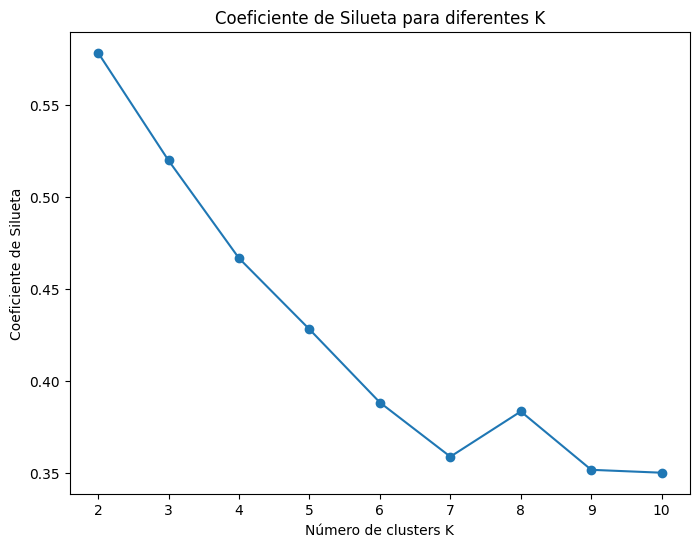

In [50]:
plt.figure(figsize=(8,6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes K')
plt.show()

# 3. Aplicar K-Means con el número óptimo de clusters

In [51]:
# Supongamos que el número óptimo de clusters es 4 basado en los gráficos anteriores
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

# 4. Análisis de los clusters

In [52]:
print("Número de clientes por cluster:")
df['Cluster'].value_counts()

Número de clientes por cluster:


Cluster
1    2872
3    2834
2    2577
0    2523
Name: count, dtype: int64

# 5. Visualización de los clusters (usando los dos primeros componentes principales)

In [53]:
df_pca.head()

,PC1,PC2
0,3.341571,-0.467280
1,10.344181,0.513711
2,-18.653166,1.027589
3,-10.654714,5.097033
4,24.340663,3.799962


In [54]:
df_pca.shape

(10806, 2)

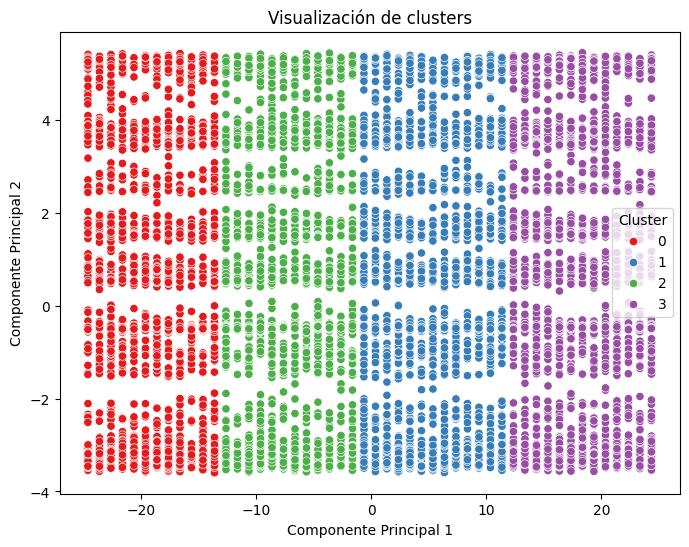

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['Cluster'], palette='Set1')
plt.title('Visualización de clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

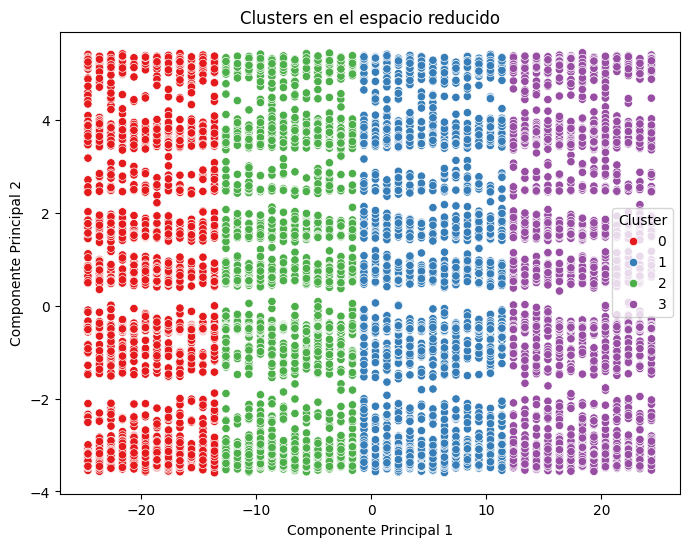

In [58]:
# PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
reduced_features = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])

# Graficar clusters en el espacio reducido
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features['PC1'], y=reduced_features['PC2'], hue=df['Cluster'], palette='Set1')
plt.title('Clusters en el espacio reducido')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()
